#### 本次成绩:100   

### 评卷标准:
- 分析，理顺，项目要求并落实在文档中   √
- 比较不同结果 ，思考，改进，总结。   √
- 成绩提交并截图成绩   √
- 最终结论，报告。    √

猛哥最棒~

#### 评卷：David

In [2]:
# 导入包
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 

%matplotlib inline

In [3]:
# 读入数据
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

为了处理方便，预测集和训练集合二为一

In [4]:
df_train.loc[:,'trainset'] = 1

In [5]:
df_test.loc[:,'trainset'] = 0

In [6]:
df_full = df_train.append(df_test)
df_full.shape

(2919, 82)

In [894]:
df_full.sample(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,trainset
183,972,839,0,NaN,3,1Fam,TA,No,225.0,276.0,...,0,Pave,7,972.0,AllPub,225,2002,2002,2009,0
984,761,380,0,NaN,3,1Fam,TA,No,122.0,448.0,...,0,Pave,6,570.0,AllPub,0,1900,1950,2007,0
96,1588,0,0,NaN,3,1Fam,TA,Av,1162.0,0.0,...,0,Pave,6,1588.0,AllPub,158,1999,1999,2006,1
296,910,648,0,NaN,4,1Fam,TA,No,420.0,0.0,...,0,Pave,6,910.0,AllPub,289,1950,1950,2007,1
977,1241,0,0,Pave,1,TwnhsE,TA,No,1106.0,0.0,...,0,Pave,4,1241.0,AllPub,0,2006,2007,2007,1


### 0.数据分析

In [112]:
# 计算训练集上的最大值/最小值
y = df_full[df_full.trainset == 1].SalePrice
minimum_price = np.min(y)
maximum_price = np.max(y)
mean_price = np.mean(y)
median_price = np.median(y)
std_price = np.std(y)

print(minimum_price,maximum_price,mean_price,median_price,std_price)

34900.0 755000.0 180921.19589041095 163000.0 79415.29188606751


In [896]:
df_full.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,trainset
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737,0.500171
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964,0.500086
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000,0.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000,0.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000,1.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000,1.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000,1.000000


* 销售价格分布

In [146]:
df_full.skew()

1stFlrSF                  0.063895
2ndFlrSF                  0.862118
3SsnPorch                11.381914
BedroomAbvGr              0.326492
BsmtFinSF1                2.142094
BsmtFinSF2                1.855755
BsmtFullBath              0.625153
BsmtHalfBath              3.933616
BsmtUnfSF                 0.919812
EnclosedPorch             4.005950
Fireplaces                0.733872
FullBath                  0.167692
GarageArea                0.239380
GarageCars               -0.219694
GarageYrBlt              -0.392992
GrLivArea                 0.012386
HalfBath                  0.694924
KitchenAbvGr              4.304467
LotArea                  12.829025
LotFrontage               1.646420
LowQualFinSF             12.094977
MSSubClass                1.376165
MasVnrArea                2.614936
MiscVal                  21.958480
MoSold                    0.195985
OpenPorchSF               2.536417
OverallCond               0.570605
OverallQual               0.197212
PoolArea            

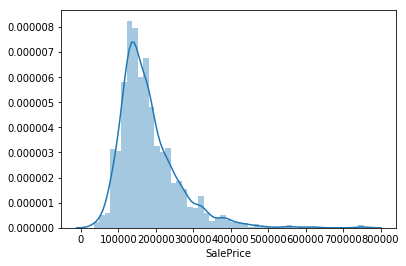

In [898]:
sns.distplot(y)

从图中可以看出，售价集中在100000到200000区间。并且数据分布不均匀，可通过log变化来正畸。

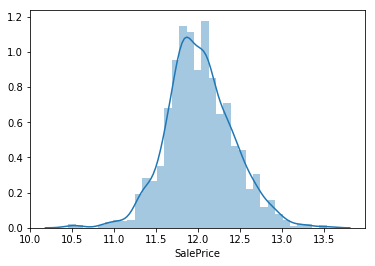

In [113]:
y_log = np.log(y)
sns.distplot(y_log)


处理后的分布好看多了，比较符合正态分布。

In [114]:
df_full[df_full.trainset == 1].SalePrice = y_log


/Users/limeng/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


GrLivArea 如此重要的一个特征（是从模型输出的），看看他的分布情况

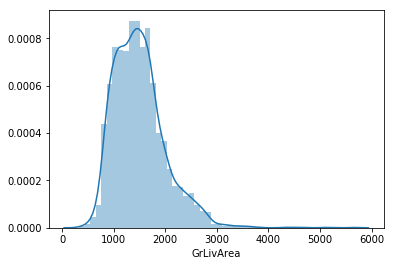

In [115]:
sns.distplot(df_full.GrLivArea)

同样进行log变换一下~

In [116]:
df_full.GrLivArea = np.log(df_full.GrLivArea)

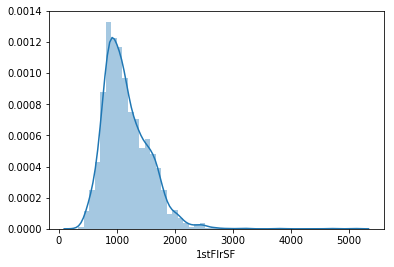

In [117]:
sns.distplot(df_full['1stFlrSF'])

In [118]:
df_full['1stFlrSF'] = np.log(df_full['1stFlrSF'])

TotalBsmtSF分布(图丢了。。)

咦，有情况，有大量的0值。在变换后可能会影响结果，0不会发生改变，而其他值被缩放。这里新增一个特征来表示地下室面积是否大于0

In [119]:
df_full['Bsmt_g0'] = pd.Series(len(df_full['TotalBsmtSF']), index=df_full.index)
df_full['Bsmt_g0'] = 0 
df_full.loc[df_full['TotalBsmtSF']>np.NZERO,'Bsmt_g0'] = 1

In [120]:
df_full[df_full.TotalBsmtSF > np.NZERO].TotalBsmtSF = np.log(df_full[df_full.TotalBsmtSF > np.NZERO].TotalBsmtSF)

/Users/limeng/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


探索一下特征和预测值是否存在关联  
类别型特征与预测值绘制成箱线图  

/Users/limeng/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


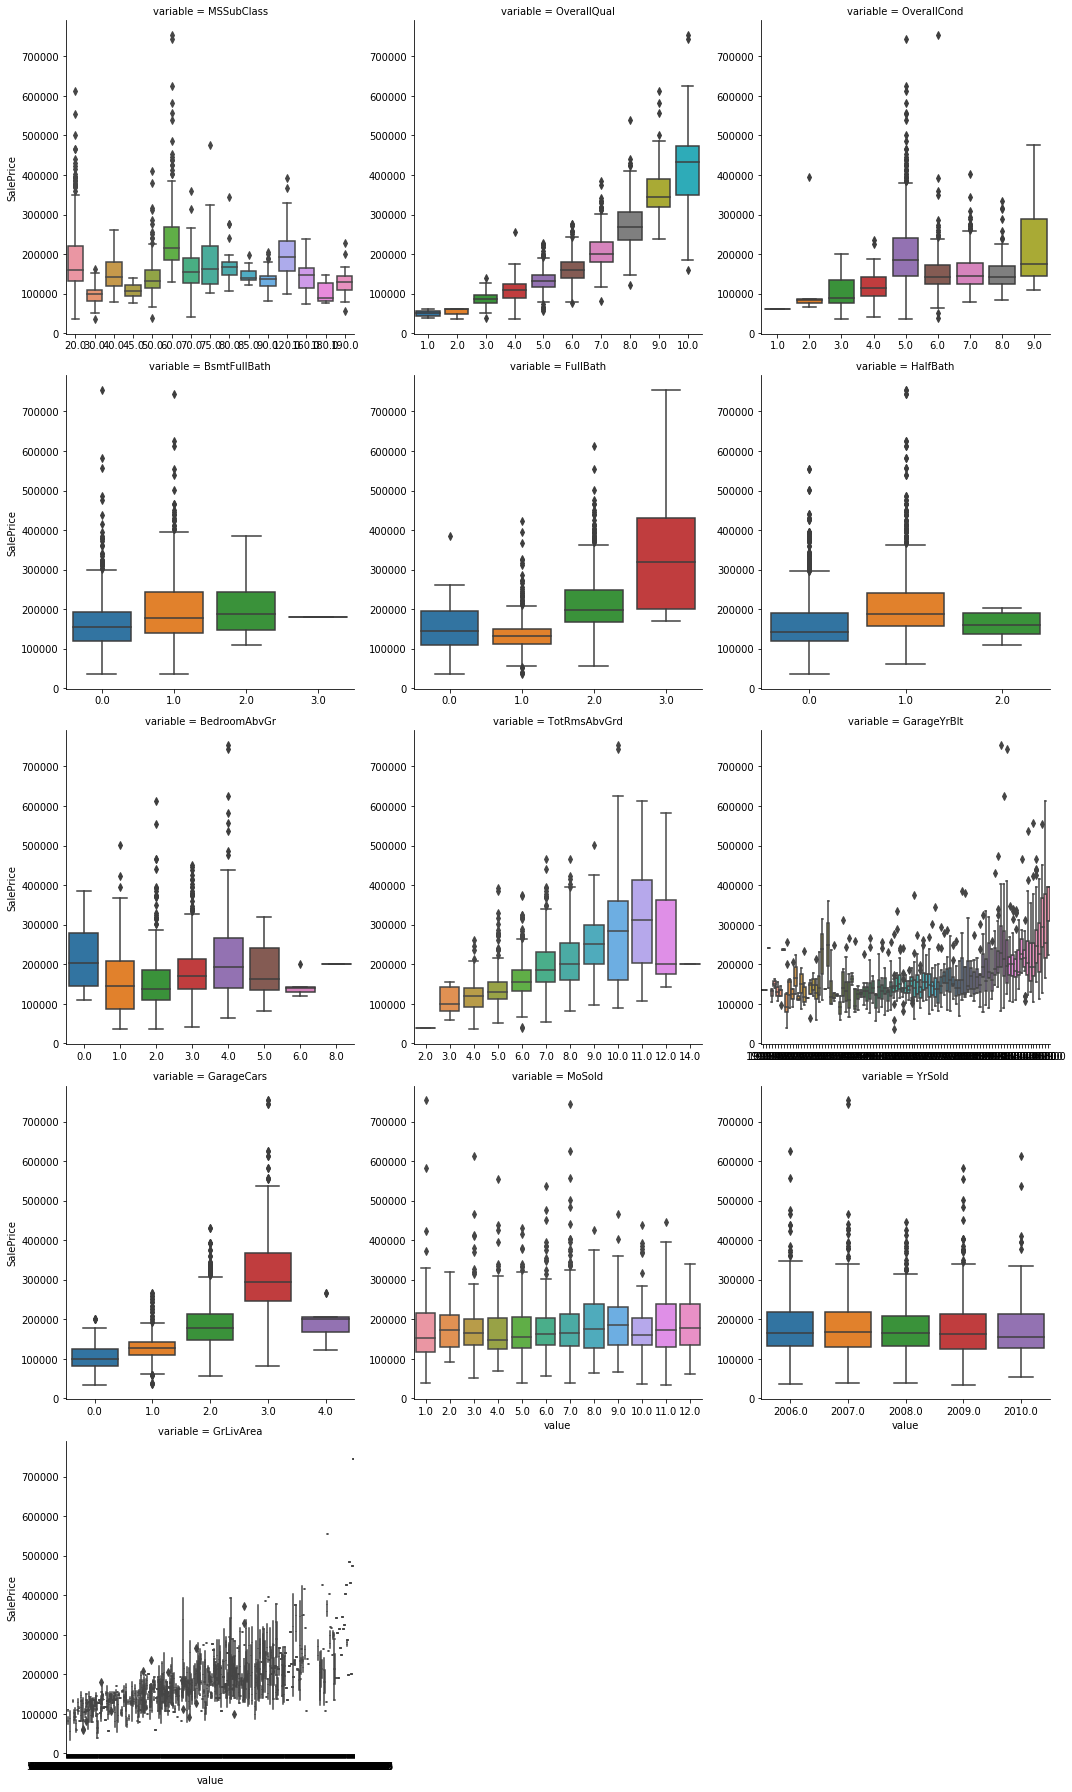

In [78]:
nomial_feats=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath',
             'BedroomAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageCars','MoSold','YrSold','HalfBath','GrLivArea',
             'GarageCars']

def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
f = pd.melt(df_full,id_vars=['SalePrice'],value_vars=nomial_feats)
g = sns.FacetGrid(f,col='variable',col_wrap=3,sharex=False,sharey=False,size=5)
g = g.map(boxplot,"value","SalePrice")

从上图可以看出：  
OverallQual、GarageCars与预测值表现出正相关关系。可以将其转化为数值直接参与建模。

看下特征之间的关联情况

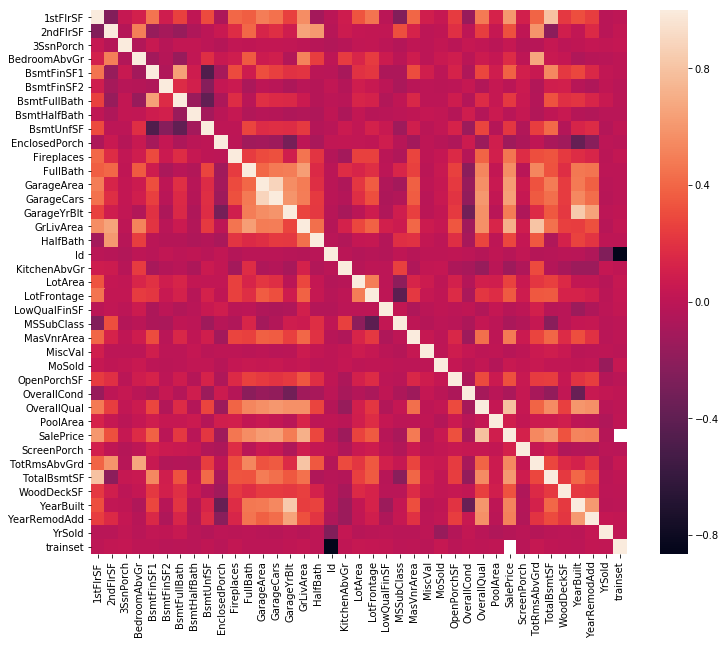

In [586]:
import matplotlib.pyplot as plt  
plt.subplots(figsize=(12,10))
corrmat = df_full.corr()
g = sns.heatmap(df_full.corr())

图中，颜色越浅的代表关联度越高。找出关联关系较大的特征：  
GarageCars & GarageArea,YearBuilt & GarageYrBlt,GrLivArea & TotRmsAbvGrd  
GarageCars & GarageArea：车库越大，车位数越多  
YearBuilt & GarageYrBlt：车库的建造日期和房子的建造日期肯定是基本一致的  
GrLivArea & TotRmsAbvGrd:总居住面积和房间总数也是正比关系


将GrLivArea 与 TotRmsAbvGrd做2阶多项式交叉

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

poly = PolynomialFeatures(degree=2,interaction_only=True)
minmaxScal = MinMaxScaler()
df_poly = pd.DataFrame({'GrLivArea':df_full.GrLivArea,'TotRmsAbvGrd':df_full.TotRmsAbvGrd})
X_poly = poly.fit_transform(df_poly)
poly.get_feature_names()

['1', 'x0', 'x1', 'x0 x1']

In [122]:
# 拼接到数据集中
newcol = list(zip(*X_poly))
df_full.loc[:,'GrLivArea_x0'] = newcol[1]
df_full.loc[:,'GrLivArea_x1'] = newcol[2]
df_full.loc[:,'GrLivArea_x0x1'] = newcol[3]

In [81]:
df_full.shape

(2919, 86)

训练模型后，输出了最重要的几个特征，基于这些特征看看能否找到突破点  
整体质量：OverallQual', '居住面积：GrLivArea', '一楼面积：1stFlrSF', '地下室面积：TotalBsmtSF', '不明：BsmtFinSF1

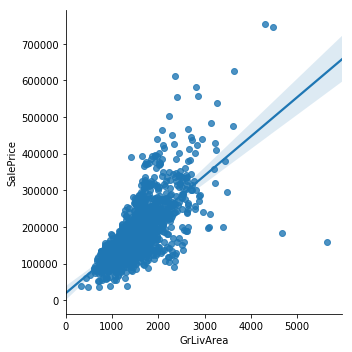

In [672]:
# GrLivArea 居住面积
sns.lmplot(x='GrLivArea',y='SalePrice',data=df_full[df_full.trainset==1])

由上图可以观察到，居住面积和售价表现为正相关关系。但是有少数的离群点，如此大的面积竟然售价奇低，怀疑会影响到最后的建模。干脆直接去掉。

In [675]:
# 去掉右侧利群点，也就是售价低于300000，面积大于4000的
# 这里移除离群点放到后面，建模之前--测试集和训练集的index重复

### 1.数据预处理

ID没啥用，直接去掉

In [123]:
df_full.drop(['Id'],axis=1,inplace=True)

In [124]:
# 借用老外的代码，观察一下缺失情况
def nullValueCounter():
    perc_na = (df_full.isnull().sum()/len(df_full))*100
    ratio_na = perc_na.sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :ratio_na})
    print(missing_data.head(20))
nullValueCounter()

              Missing Ratio
PoolQC            99.657417
MiscFeature       96.402878
Alley             93.216855
Fence             80.438506
SalePrice         49.982871
FireplaceQu       48.646797
LotFrontage       16.649538
GarageFinish       5.447071
GarageQual         5.447071
GarageCond         5.447071
GarageYrBlt        5.447071
GarageType         5.378554
BsmtCond           2.809181
BsmtExposure       2.809181
BsmtQual           2.774923
BsmtFinType2       2.740665
BsmtFinType1       2.706406
MasVnrType         0.822199
MasVnrArea         0.787941
MSZoning           0.137033


In [678]:
df_full.shape

(2919, 84)

In [125]:
# 使用NA填充
col_NA = ["Alley","MasVnrType","FireplaceQu","GarageType","PoolQC","Fence",
                  "MiscFeature","GarageQual","GarageCond","GarageFinish"]
# 使用0填充
col_0 = ["MasVnrArea","GarageCars","GarageArea"]
for col in col_NA:
    df_full[col].fillna("NA",inplace=True)
    
for col in col_0:
    df_full[col].fillna(0,inplace=True)

众数填充

In [85]:
col_mode = ["MSZoning","KitchenQual","Functional","SaleType","Electrical","Exterior1st","Exterior2nd"]
for col in col_mode:
    df_full[col].fillna(df_full[col].mode()[0],inplace=True)


均值填充

In [86]:
df_full['LotFrontage'] = df_full.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [126]:
#由于缺失值的个数是不一样的，所以只有BsmtCond和BsmtQual同时缺失，才将其认为是没有地下室的。
NoBmstIndex = (pd.isnull(df_full["BsmtCond"])==True)&(pd.isnull(df_full["BsmtQual"])==True)

df_full.loc[NoBmstIndex,"BsmtCond"] =df_full.loc[NoBmstIndex,"BsmtCond"].fillna("NA")
df_full.loc[NoBmstIndex,"BsmtQual"] =df_full.loc[NoBmstIndex,"BsmtQual"].fillna("NA")
df_full.loc[NoBmstIndex,"BsmtExposure"] =df_full.loc[NoBmstIndex,"BsmtExposure"].fillna("NA")

#其余的用众数来填充
df_full.BsmtCond.fillna(df_full.BsmtCond.mode()[0],inplace=True)
df_full.BsmtQual.fillna(df_full.BsmtQual.mode()[0],inplace=True)
df_full.BsmtExposure.fillna(df_full.BsmtExposure.mode()[0],inplace=True)

df_full.BsmtFinSF1.fillna(0,inplace=True)
df_full.BsmtFinSF2.fillna(0,inplace=True)
df_full.BsmtFinType1.fillna("NA",inplace=True)
df_full.BsmtFinType2.fillna("NA",inplace=True)

#要将没有地下室和地下室未完成的面积区分开，所以如果是未完成的，将其面积设为中位数
df_full.loc[df_full["BsmtFinType1"]=="Unf","BsmtFinSF1"]=df_full.BsmtFinSF1.median()
df_full.loc[df_full["BsmtFinType2"]=="Unf","BsmtFinSF2"]=df_full.BsmtFinSF1.median()

df_full.BsmtUnfSF.fillna(0,inplace=True)
df_full.TotalBsmtSF.fillna(0,inplace=True)

df_full.BsmtFullBath.fillna(0, inplace=True)
df_full.BsmtHalfBath.fillna(0, inplace=True)


数值型的均值填充吧


In [127]:
df_full.BsmtFinSF1 = df_full.BsmtFinSF1.fillna(df_full.BsmtFinSF1.mean())
df_full.BsmtFinSF2 = df_full.BsmtFinSF2.fillna(df_full.BsmtFinSF2.mean())
df_full.BsmtUnfSF = df_full.BsmtUnfSF.fillna(df_full.BsmtUnfSF.mean())
df_full.GarageArea = df_full.GarageArea.fillna(df_full.GarageArea.mean())
df_full.GarageCars = df_full.GarageCars.fillna(df_full.GarageCars.mean())
df_full.GarageYrBlt = df_full.GarageYrBlt.fillna(df_full.GarageYrBlt.mean())
df_full.LotFrontage = df_full.LotFrontage.fillna(df_full.LotFrontage.mean())
df_full.MasVnrArea = df_full.MasVnrArea.fillna(df_full.MasVnrArea.mean())
MasVnrArea_mean = df.MasVnrArea.mean()
df.MasVnrArea = df.MasVnrArea.fillna(MasVnrArea_mean)

In [128]:
df_full.BsmtFullBath = df_full.BsmtFullBath.fillna(df_full.BsmtFullBath.mean())
df_full.BsmtHalfBath = df_full.BsmtHalfBath.fillna(df_full.BsmtHalfBath.mean())
df_full.TotalBsmtSF = df_full.TotalBsmtSF.fillna(df_full.TotalBsmtSF.mean())

In [129]:
df_full.GarageYrBlt = df_full.GarageYrBlt.fillna(df_full.GarageYrBlt.mean())
df_full.drop(['Utilities'],axis=1,inplace=True)


看下现在的数据缺失情况~

In [130]:
nullValueCounter()

               Missing Ratio
SalePrice          49.982871
MSZoning            0.137033
Functional          0.068517
Electrical          0.034258
SaleType            0.034258
Exterior1st         0.034258
Exterior2nd         0.034258
KitchenQual         0.034258
ExterQual           0.000000
Fence               0.000000
FireplaceQu         0.000000
Fireplaces          0.000000
FullBath            0.000000
Foundation          0.000000
EnclosedPorch       0.000000
GarageArea          0.000000
GarageCars          0.000000
GarageCond          0.000000
GarageFinish        0.000000
GarageQual          0.000000


余下的缺失率都还好，且都为类别型（数值型已经处理完毕）。因此决定将缺失值作为单独一类

In [131]:
categorial_variables = list(df_full.select_dtypes(exclude=['int64', 'float64', 'bool']).columns.values)
df_full[categorial_variables] = df_full[categorial_variables].apply(lambda x: x.fillna("FN"),axis=0)

In [132]:
# 看下结果
nullValueCounter()

                Missing Ratio
SalePrice           49.982871
GrLivArea_x0x1       0.000000
FullBath             0.000000
ExterQual            0.000000
Exterior1st          0.000000
Exterior2nd          0.000000
Fence                0.000000
FireplaceQu          0.000000
Fireplaces           0.000000
Foundation           0.000000
Functional           0.000000
EnclosedPorch        0.000000
GarageArea           0.000000
GarageCars           0.000000
GarageCond           0.000000
GarageFinish         0.000000
GarageQual           0.000000
GarageType           0.000000
GarageYrBlt          0.000000
GrLivArea            0.000000


这下可算清爽了

怎么能忍心让类别型变量直接参与建模计算，于是，独热编码亮相登场~

In [133]:
df_full = pd.get_dummies(df_full)
df_full.shape

(2919, 314)

so easy~

### 2. 建模

评估标准

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def estimater(y,pred_y):
    meanSquaredError=mean_squared_error(np.log(y), np.log(pred_y))
    rootMeanSquaredError = np.sqrt(meanSquaredError)
    print("RMSE:", rootMeanSquaredError)


先做好准备工作，训练集和预测集该分家了。

In [135]:
test = df_full[df_full.trainset == 0]
train = df_full[df_full.trainset == 1]

# 继前面数据分析结果，此处移除离群点
train.drop(train[(train.GrLivArea>4000)&(train.SalePrice<300000)&train.trainset==1].index,inplace=True)



/Users/limeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


临时增加的用于区别训练集和测试集的列也去掉

In [136]:
test.drop(['SalePrice'],axis=1,inplace=True)
test.drop(['trainset'],axis=1,inplace=True)
train.drop(['trainset'],axis=1,inplace=True)


/Users/limeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/limeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/limeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [137]:
print(train.shape,test.shape)

(1460, 313) (1459, 312)


2:8瓜分数据集，分别获得测试集和训练集

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('SalePrice',axis=1),train.SalePrice,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1168, 312) (1168,) (292, 312) (292,)


数据已好，杀手锏xgboost亮相

In [139]:
# 导入必备包
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import ShuffleSplit 
from sklearn.metrics import r2_score, make_scorer, mean_squared_error # import metrics from sklearn
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import ensemble 

1.建模

xgboost

In [140]:
# 建模
xgb_model = xgb.XGBRegressor(
    learning_rate = 0.04,
    max_depth = 3,
    min_child_weight = 1.5,
    n_estimators = 1200,                                                                  
    seed = 42,
    silent = 1,
    colsample_bytree=0.7,
    random_state=2018)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=2018,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

随机森林

In [702]:
rf_regressor = RandomForestRegressor(random_state=42)
cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for cross-validation
parameters = {'n_estimators':[100, 120, 140], 
              'min_samples_leaf':[1, 2, 3], 
              'max_depth':[10,15,20]}
scorer = make_scorer(r2_score)
n_iter_search = 10
grid_obj = RandomizedSearchCV(rf_regressor, 
                              parameters, 
                              n_iter = n_iter_search, 
                              scoring = scorer, 
                              cv = cv_sets,
                              random_state= 99)
grid_fit = grid_obj.fit(X_train, Y_train)
rf_opt = grid_fit.best_estimator_

岭回归

In [779]:
ridge = linear_model.Ridge(alpha=0.1114)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1114, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Lasso

In [782]:
lasso = Lasso(alpha=0.109)
lasso.fit(X_train, Y_train)

/Users/limeng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.109, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

GBDT

In [722]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,  
              'learning_rate': 0.01, 'loss': 'ls'}  
gbdt = ensemble.GradientBoostingRegressor(**params)  
gbdt.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

2.预测

In [723]:
gbdt_predict = gbdt.predict(X_test)

In [783]:
lasso_predict = lasso.predict(X_test)

In [780]:
ridge_predict = ridge.predict(X_test)

In [141]:
xgb_predict = xgb_model.predict(X_test) 

In [733]:
rf_preds = rf_opt.predict(X_test)

3.评估

In [776]:
#GBDT
estimater(Y_test,gbdt_predict)

RMSE: 0.145122615944


In [784]:
#lasso
estimater(Y_test,lasso_predict)

RMSE: 0.15649496152


In [781]:
#ridge
estimater(Y_test,ridge_predict)

RMSE: 0.152107348605


In [142]:
#xgboost
estimater(Y_test,xgb_predict)

RMSE: 0.129335246278


In [778]:
#RF
estimater(Y_test,rf_preds)

RMSE: 0.16148042803


4.预测结果

In [798]:
y_xgb_pred = xgb_model.predict(test)
y_gbdt_pred = gbdt.predict(test)
y_lasso_pred = lasso.predict(test)
y_ridge_pred = ridge.predict(test)
y_rf_pred = rf_opt.predict(test)

保存到CSV

In [799]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_xgb_pred})
my_submission.to_csv('result_xgb.csv', index=False)
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_gbdt_pred})
my_submission.to_csv('result_gbdt.csv', index=False)
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_lasso_pred})
my_submission.to_csv('result_lasso.csv', index=False)
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_ridge_pred})
my_submission.to_csv('result_ridge.csv', index=False)
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_rf_pred})
my_submission.to_csv('result_rf.csv', index=False)

融合

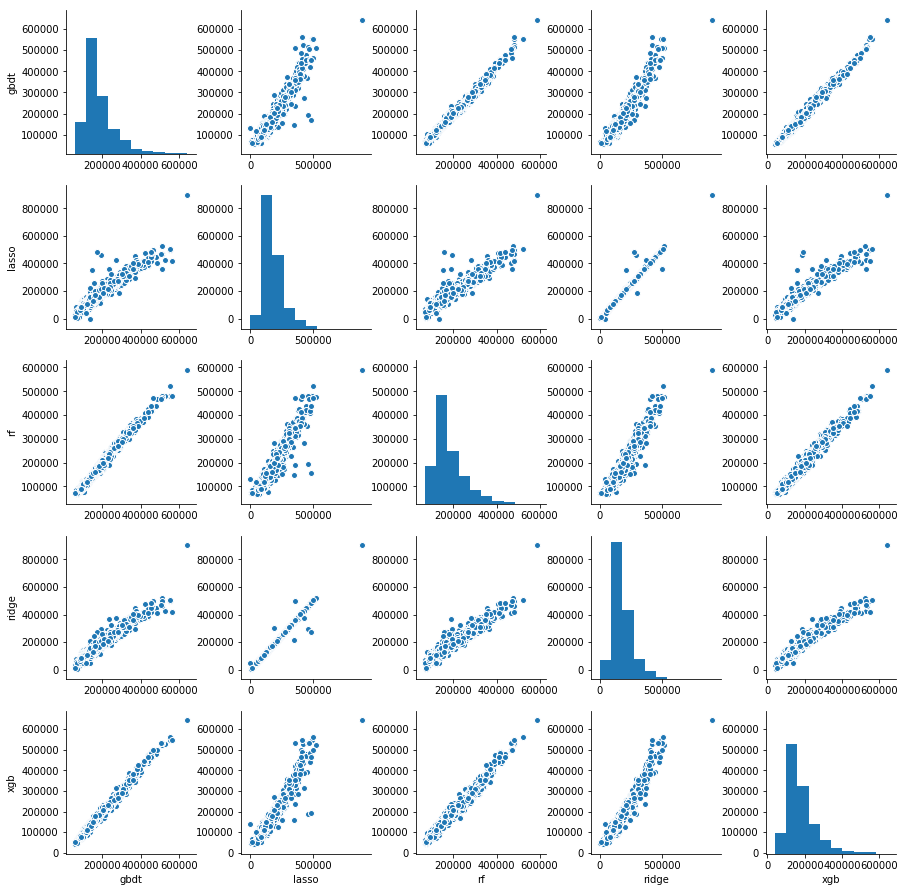

In [790]:
preds = pd.DataFrame({"xgb":y_xgb_pred,"gbdt":y_gbdt_pred,"lasso":y_lasso_pred,"ridge":y_ridge_pred,"rf":y_rf_pred})
sns.pairplot(preds)

综合上图以及预测结果的RMSE，可以得出预测能力：   
xgboost > GBDT > RF > ridge > lasso  
为其分配权重，做融合：  
[0.6,0.2,0.08,0.07,0.05]


In [ ]:
y_xgb_pred = xgb_model.predict(test)
y_gbdt_pred = gbdt.predict(test)
y_lasso_pred = lasso.predict(test)
y_ridge_pred = ridge.predict(test)
y_rf_pred = rf_opt.predict(test)

model_avg = AveragingModels(models=(xgb_model,gbdt,lasso,ridge,rf_opt),weights=(0.6,0.2,0.08,0.07,0.05))

estimater(model_avg,X_test,Y_test)


保存到csv中

In [750]:
model_avg.fit(X_test,Y_test)
pred_y = model_avg.predict(test)

/Users/limeng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [752]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': pred_y})
my_submission.to_csv('result_mixed.csv', index=False)